In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib


In [2]:

file_path = 'mal-dns2tcp.csv'  
data = pd.read_csv(file_path)




In [3]:

features = ['Duration', 'FlowBytesSent', 'FlowBytesReceived', 
            'PacketLengthMean', 'PacketTimeVariance', 'ResponseTimeTimeMean']
target = 'DoH'


In [4]:

X = data[features]
y = data[target]



In [5]:
# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


C:\Users\DELL\.ipython\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL\AppData\Local\Temp\ipykernel_21352\1211037530.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 3)
C:\Users\DELL\AppData\Local\Temp\ipykernel_21352\1211037530.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 4)
C:\Users\DELL\AppData\Local\Temp\ipykernel_21352\1211037530.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


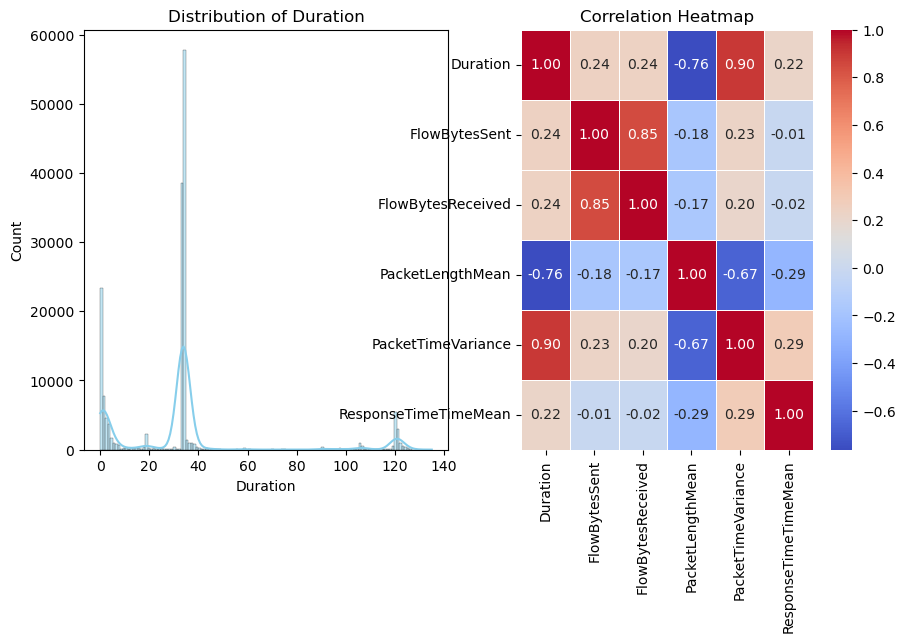

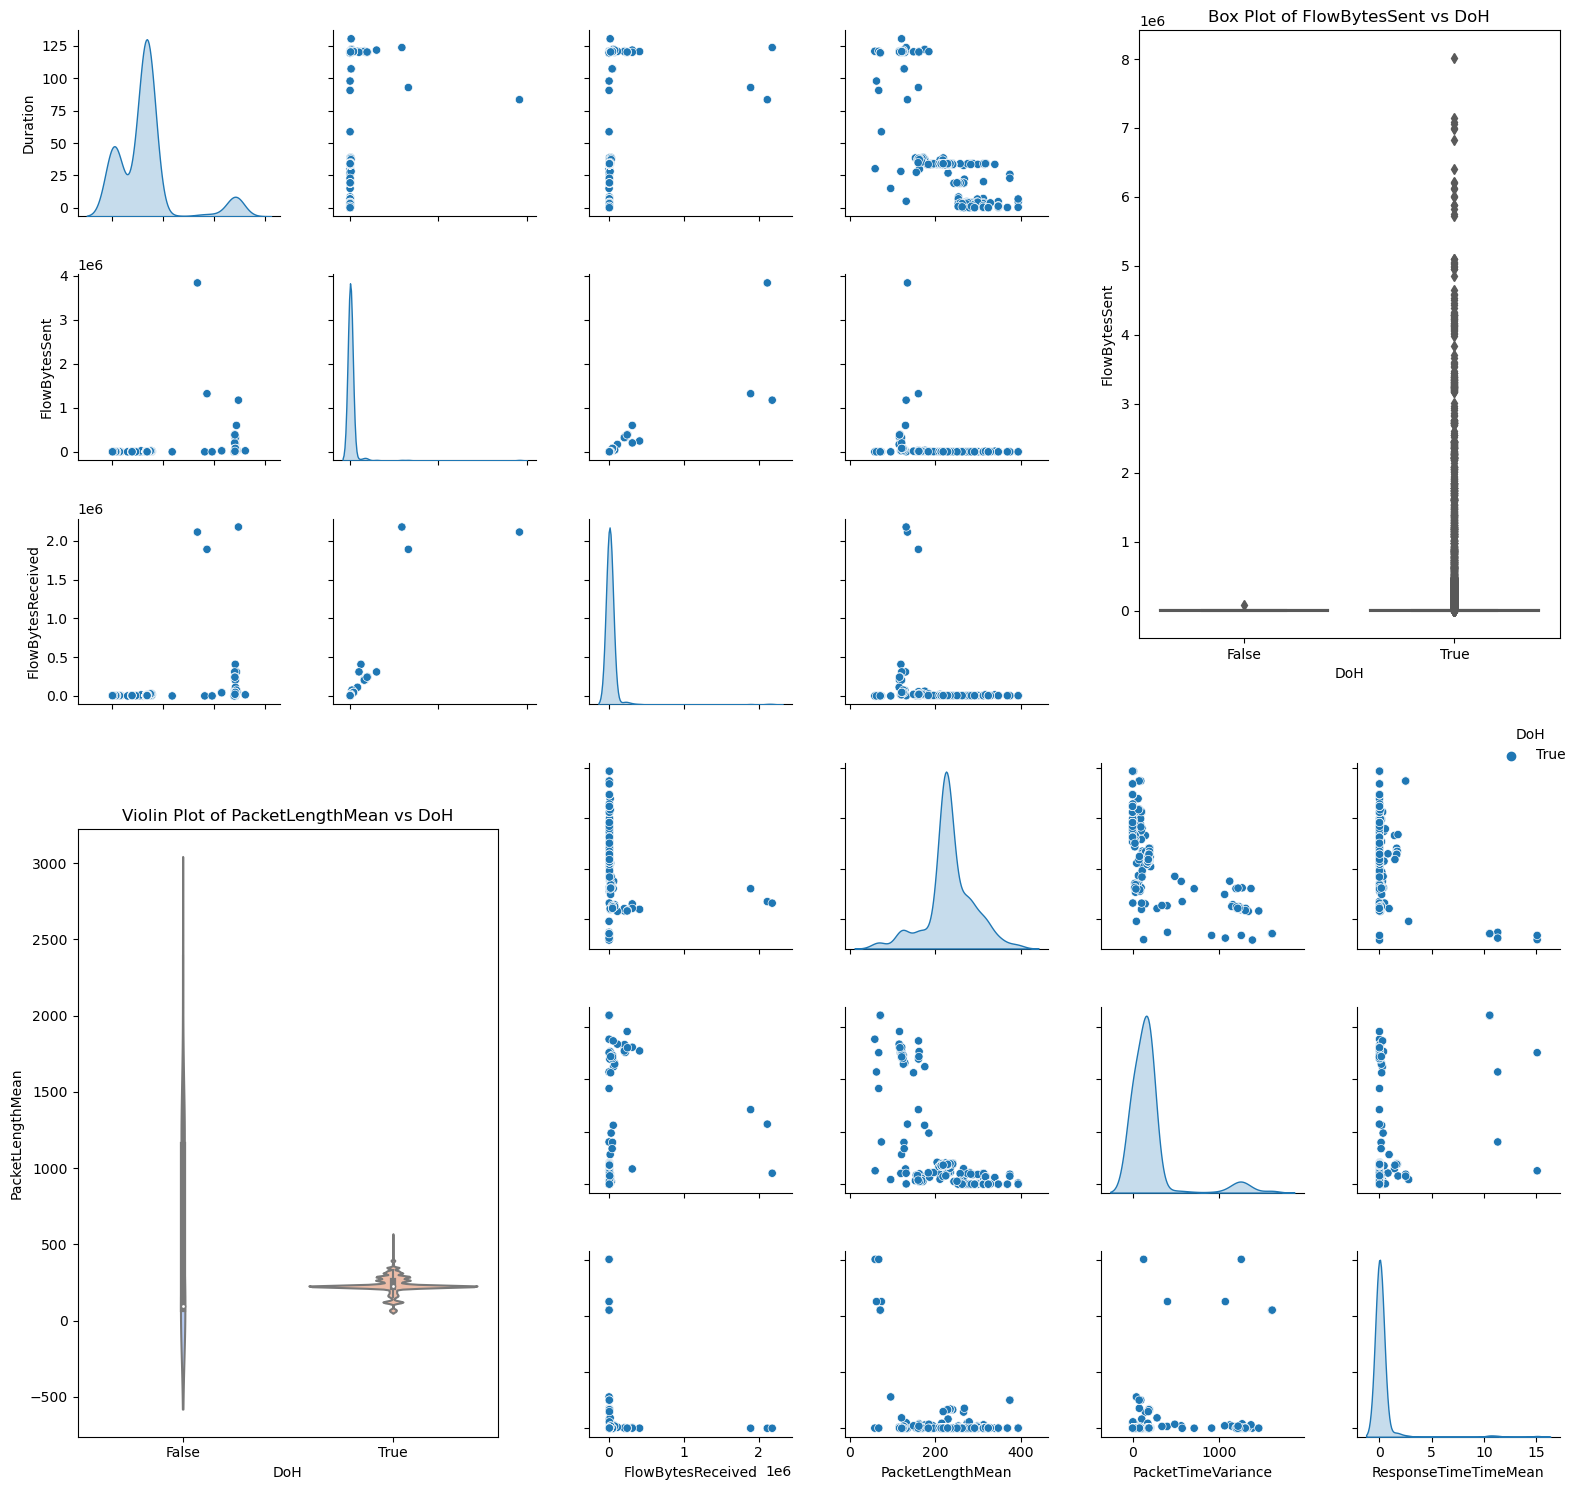

In [7]:

plt.figure(figsize=(16, 12))

# 1. Distribution of Duration
plt.subplot(2, 3, 1)
sns.histplot(data['Duration'], kde=True, color='skyblue')
plt.title('Distribution of Duration')

plt.subplot(2, 3, 2)
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

# 3. Pairplot of selected features
sns.pairplot(data[features + [target]].sample(500), hue=target, diag_kind='kde')

# 4. Box plot for FlowBytesSent and DoH
plt.subplot(2, 3, 3)
sns.boxplot(x=data['DoH'], y=data['FlowBytesSent'], palette='Set2')
plt.title('Box Plot of FlowBytesSent vs DoH')

# 5. Violin plot for PacketLengthMean and DoH
plt.subplot(2, 3, 4)
sns.violinplot(x=data['DoH'], y=data['PacketLengthMean'], palette='coolwarm')
plt.title('Violin Plot of PacketLengthMean vs DoH')

plt.tight_layout()
plt.show()



# RandomForestClassifier

In [8]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Classifier Report:\n")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))




Random Forest Classifier Report:

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      1.00      1.00     33497

    accuracy                           1.00     33504
   macro avg       1.00      0.93      0.96     33504
weighted avg       1.00      1.00      1.00     33504

Random Forest Accuracy: 0.9999701528175741


# Logistic Regression

In [9]:

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\nLogistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))




Logistic Regression Report:

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       1.00      1.00      1.00     33497

    accuracy                           1.00     33504
   macro avg       1.00      0.79      0.86     33504
weighted avg       1.00      1.00      1.00     33504

Logistic Regression Accuracy: 0.9999104584527221


# Support Vector Machine (SVM)

In [10]:

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nSVM Report:\n")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))



SVM Report:

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       1.00      1.00      1.00     33497

    accuracy                           1.00     33504
   macro avg       1.00      0.79      0.86     33504
weighted avg       1.00      1.00      1.00     33504

SVM Accuracy: 0.9999104584527221


In [11]:

best_model = max(
    [('Random Forest', rf, accuracy_score(y_test, y_pred_rf)),
     ('Logistic Regression', lr, accuracy_score(y_test, y_pred_lr)),
     ('SVM', svm, accuracy_score(y_test, y_pred_svm))],
    key=lambda x: x[2]
)

print(f"\nBest model: {best_model[0]} with accuracy: {best_model[2]:.4f}")

# Save the best model for Flask deployment
joblib.dump(best_model[1], 'best_dns_model.pkl')

print(f"Best model saved as 'best_dns_model.pkl'")


Best model: Random Forest with accuracy: 1.0000
Best model saved as 'best_dns_model.pkl'
